<a href="https://colab.research.google.com/github/adrianciemerych/machine-learning/blob/main/ml_course/preprocessing/04_braki_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [ ]:
# maska - True tam gdize wartości są puste
df.isnull()

# zsumowanie liczby występowania wartości pustych w danej kolumnie
df.isnull().sum()

#zsumowanie wszystkich łącznej liczby braków danych
df.isnull().sum().sum()

# policzenie procentowej ilości brakujących danych w kolumnie
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
imputer.statistics_

array([415.])

In [ ]:
# Dzięki metodzie transform możemy przetransformować dane a następnie przypisać
imputer.transform(df[['weight']])
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
# Przetranformowanie danych strategią stałą:

imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 99.0)
imputer.fit_transform(df[['price']])
df['price'] = imputer.fit_transform(df[['price']])

# Tranformacja danych strategią najczęściej występujących

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit_transform(df[['size', 'gender']])
df[['size', 'gender']] = imputer.fit_transform(df[['size', 'gender']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,female,99.0,300.0,yes
3,M,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
# Różne sposoby zbadania braków wartości 

df.isnull().sum()

pd.isnull(df['weight'])

df[pd.isnull(df['weight'])]

df[~pd.isnull(df['weight'])]

pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [ ]:
# Inne metody uzupełniania danych

df.fillna(value = 'brak')

df.fillna(value = 999)

# parametr inplace zamienia wartości w podanym obiekcie
df['size'].fillna(value = 'brak', inplace = True)
df

# Pozwala na usunięcie wierszy w których sa puste wartości
df.dropna()

# Wyświetla te kolumny gdzie jest przynajmniej 5 niepustych wartości
df.dropna(thresh = 5)

# przypisanie do głownej tabeli
df = df.dropna(thresh = 5)
df

<ipython-input-42-0e5d2ace6a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'].fillna(value = 'brak', inplace = True)


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,brak,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


BRAKI DANYCH W SZEREGACH CZASOWYCH

In [3]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


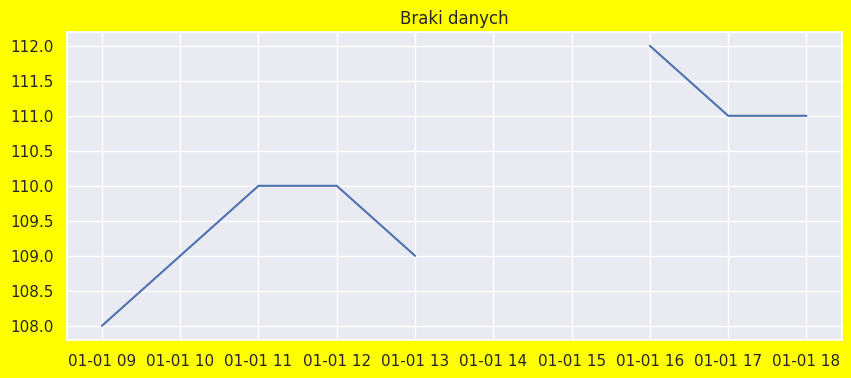

In [10]:
# Podstawowe biblioteki do wizualizacji danych

from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize = (10,4), facecolor = 'yellow', edgecolor = 'black')
plt.title('Braki danych')
_ = plt.plot(df.price)




In [12]:
# Biblioteka dzięki której możliwe są interaktywne wizualizacje

import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width = 600, height = 400, 
        title = 'Szeregi czasowe - braki danych')

Sposoby na brak danych

In [13]:
# Wypełnienie braków stałą wartościa 0

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400, 
        title = 'Szeregi czasowe - braki danych' )

In [14]:
# Wypełnienie braków średnią
df_plotly = df.reset_index()
df_plotly['price_mean'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_mean', width = 600, height = 400, 
        title = 'Szeregi czasowe - braki danych' )

In [15]:
# Wypełnienie braków metodą interpolacji
df_plotly = df.reset_index()
df_plotly['price_interpolate'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_interpolate', width = 600, height = 400,
        title = 'Szeregi czasowe - braki danych')


In [17]:
# Wypełnienie braków metodą forward fill

df_plotly = df.reset_index()
df_plotly['price_forwardfill'] = df_plotly['price'].fillna(method = 'ffill')
px.line(df_plotly, 'index', 'price_forwardfill', width = 600, height = 400,
        title = 'Szeregi czasowe - braki danych')


In [18]:
# Wypełnienie braków metodą backward fill
df_plotly = df.reset_index()
df_plotly['price_bfill'] = df_plotly['price'].fillna(method = 'bfill')
px.line(df_plotly, 'index', 'price_bfill', width = 600, height = 400,
        title = 'Szeregi czasowe - braki danych')